In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 다운로드

In [ ]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

# user의 장르 선호도와 전체 장르(유저들이 시청한 영화의 장르) 분포 비교

In [ ]:
active_user_ids = train_df.value_counts('user').index[:10]
genre_df = pd.merge(train_df, genre_data, on=['item'])
genre_top = genre_df

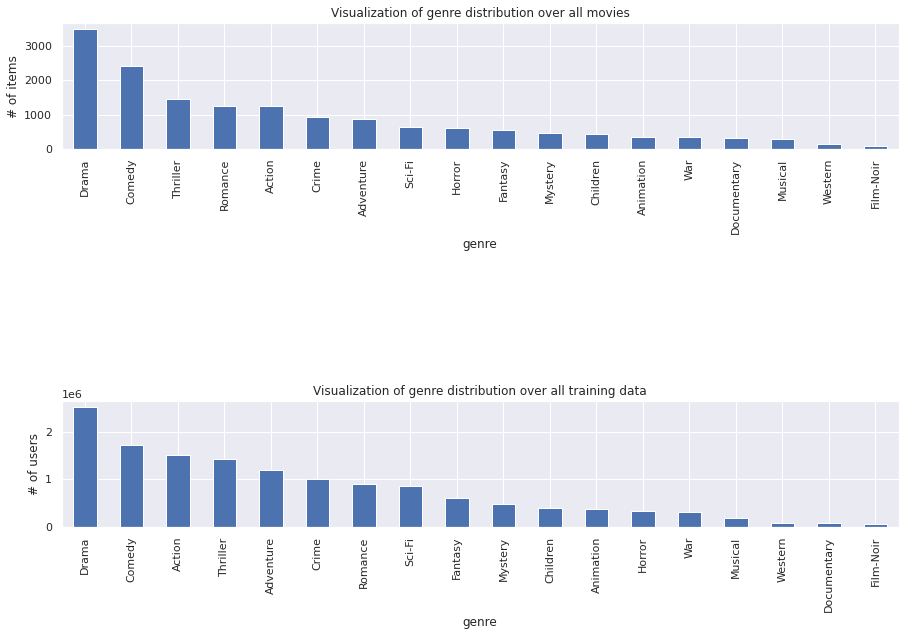

In [ ]:
plt.subplot(2,1,1)
genre_data['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of items')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_top['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=2.0, top=1.0)

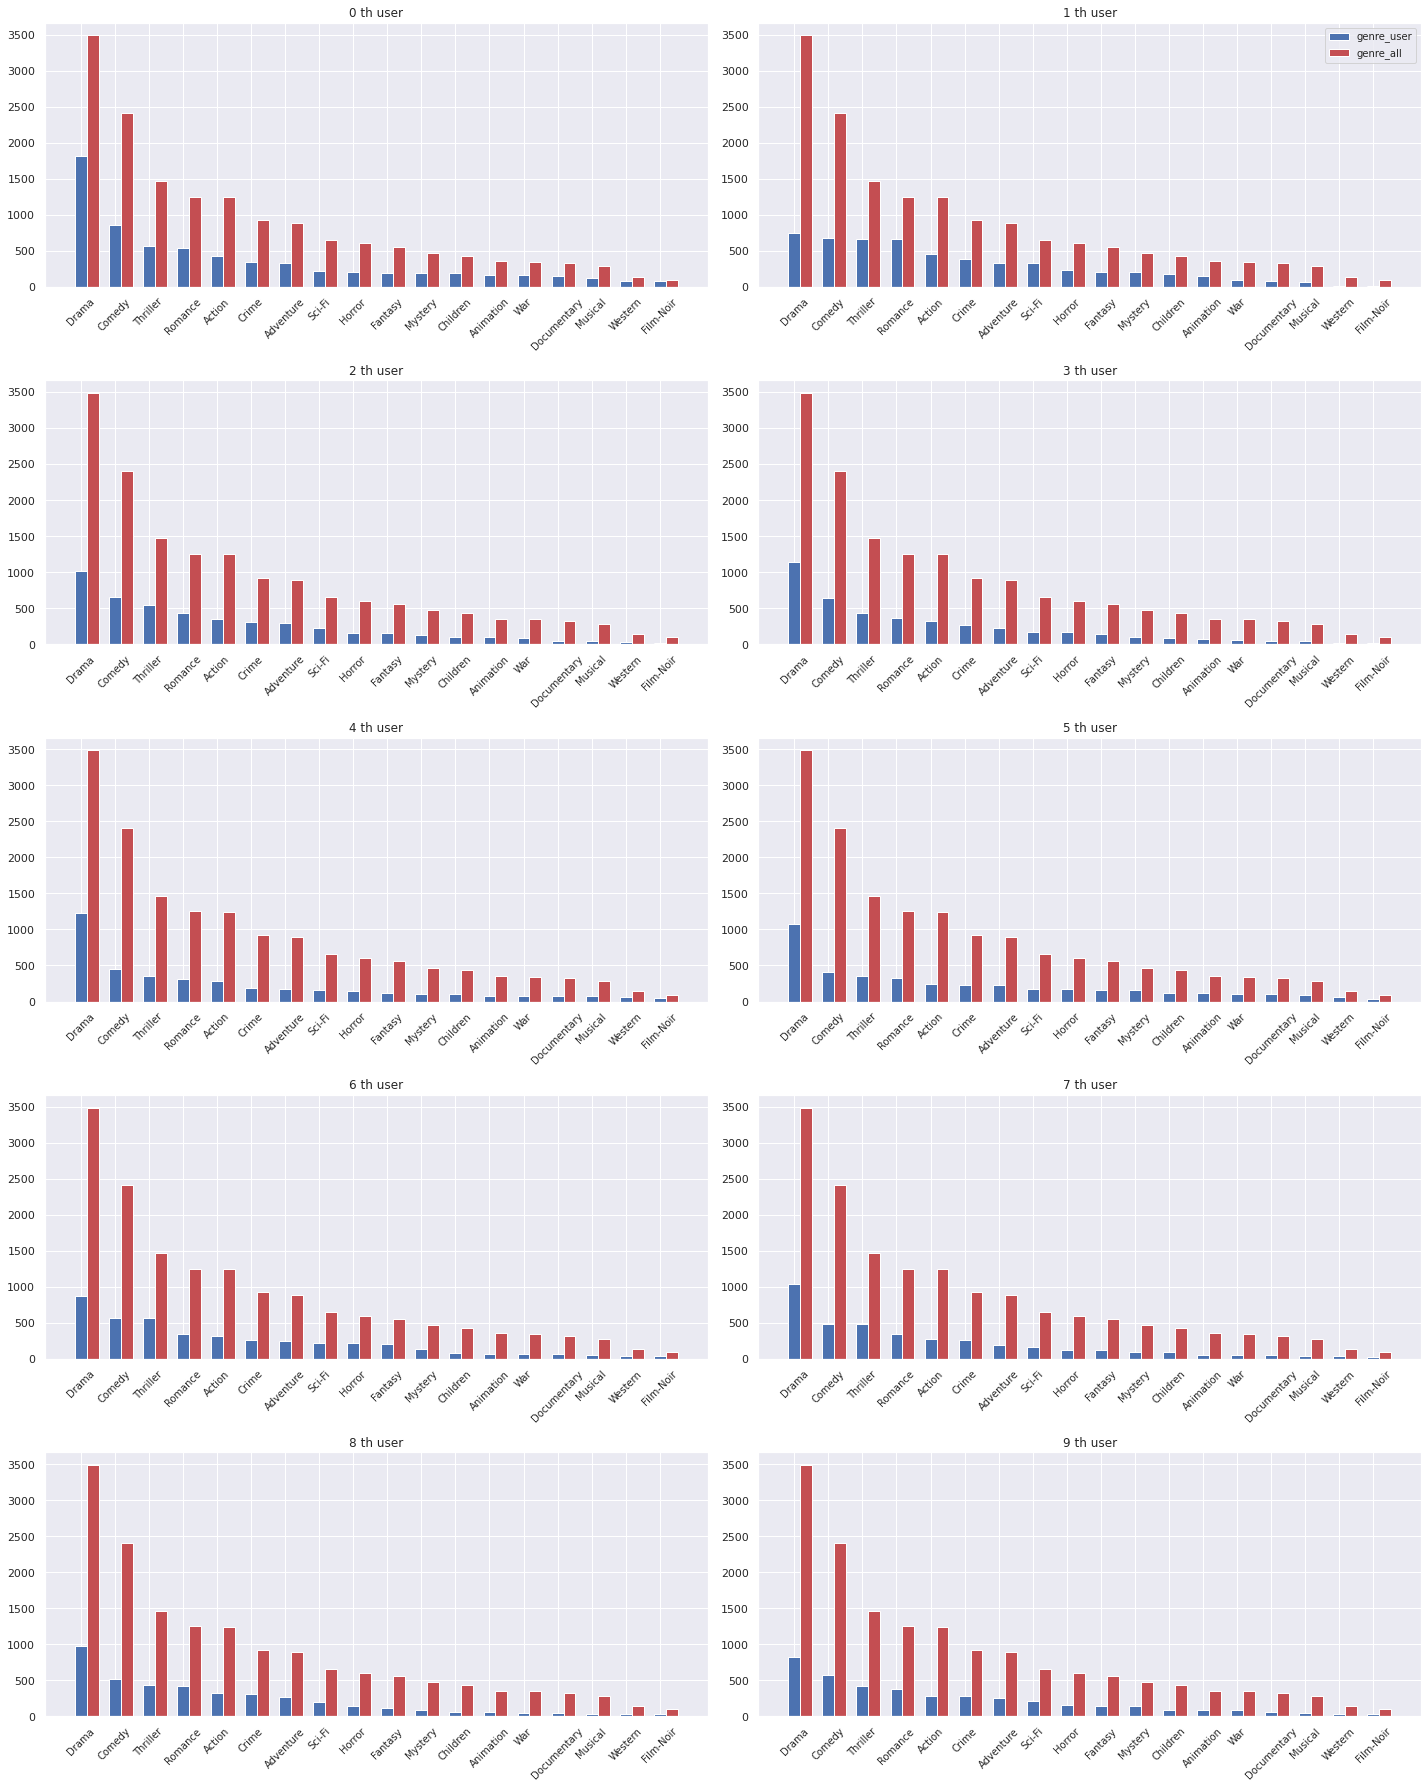

In [ ]:
genre_order= list(genre_data['genre'].value_counts().index)
plt.figure(figsize=(20,25))
for i in range(10):
    plt.subplot(5,2,i+1)
    label = list(genre_data['genre'].value_counts().index)
    index = np.arange(len(label))
    user_id = active_user_ids[i] # specific user id
    genre_user = genre_top[genre_top['user'] == user_id]
    p1= plt.bar(index,genre_user['genre'].value_counts(),0.35,color='b')
    p2= plt.bar(index+0.35,genre_data['genre'].value_counts(), 0.35,color='r')
    plt.title(f'%d th user'%i)
    plt.xticks(index, label, fontsize=10,rotation=45)
    plt.tight_layout()
    if i==1:
        plt.legend((p1[0], p2[0]), ('genre_user', 'genre_all'), fontsize=10)

-> active user의 경우 장르 선호도가 전체 장르 선호도 분포와 거의 유사한 것을 알 수 있습니다.